# Exercise 5.25

**Reference:** Robert, C. (2007). The Bayesian choice: from decision-theoretic foundations to computational implementation. Springer Science & Business Media.

**Exemple 5.3.13:** Consider $x \sim B(n, p)$, when the hypothesis to be tested is $H_0 : p = 1/2$ and $H_1 : p \neq 1/2$. The p-value associated with the likelihood ratio

$$\frac{f(x|1/2)}{\sup_p f (x|p)} = \frac{(1/2)^n}{\left(\frac{x}{n}\right)\left(1 - \frac{x}{n}\right)^{n-x}} \propto x^{-x}(n-x)^{(n-x)}
$$

is the function

$$
\tilde{p}(x) = P_{1/2}\left(X^X(n - X)^{(n-X)} \le x^x(n - x)^{(n−x)}\right),
$$
where $X \sim B(n, 1/2).$. 

For the p-value $\tilde{p}$ defined in Example 5.3.13, determine the values of $\tilde{p}(x)$
for $n = 15$ and compare with

$$p(x) = P_{1/2}[f(X|1/2) > f (x|1/2)].$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Defining the functions given in the exercise.

In [36]:
# distribuition of x|p
f = lambda n, x, p: p**x*(1-p)**(n-x)

# p_value function for each x
def p_value(x, **kwargs): 
    n = kwargs.get("n", 10)
    mc_sample = kwargs.get("size", 10000)
    # approximate p_value using Monte Carlo
    X = np.random.binomial(n = n, p = 1/2, size = mc_sample)
    p_tilde = np.mean(X**X*(n-X)**(n-X) <= x**x*(n-x)**(n-x))
    return p_tilde

# p function given in the exercise. 
def prob_likelihood(x, **kwargs):
    n = kwargs.get("n", 10)
    mc_sample = kwargs.get("size", 10000)
    # approximate p_value using Monte Carlo
    X = np.random.binomial(n = n, p = 1/2, size = mc_sample)
    p = np.mean(f(n,X,1/2) > f(n,x,1/2))
    return p

In [37]:
X = np.random.binomial(n = n, p = 1/2)

Defining the data.

In [38]:
n = 15
x = np.array(range(0,16))

Comparing the results. 

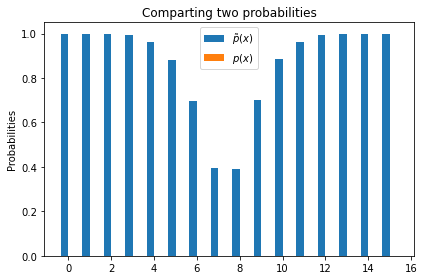

In [41]:
p_tilde = np.array([p_value(x_i, n = n) for x_i in x])
p = np.array([prob_likelihood(x_i, n = n) for x_i in x])

pos = np.arange(len(p_tilde))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(pos - width/2, p_tilde, width, label=r'$\tilde{p}(x)$')
rects2 = ax.bar(pos + width/2, p, width, label=r'$p(x)$')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probabilities')
ax.set_title('Comparting two probabilities')
ax.legend()
fig.tight_layout()

plt.show()

Of course $p(x) \equiv 0$, because $f(x|1/2) = 2^{-n}$ for every $x$> In special, $f(X|1/2)$ does not depend on $X$. 